# Summary Statistics with Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv')

In [3]:
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


## Mean and Median

In [5]:
# Filter for Belgium
be_consumption = df[df['country'] == 'Belgium']

In [6]:
# Filter for USA
usa_consumption = df[df['country'] == 'USA']

In [7]:
# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

42.13272727272727
12.59


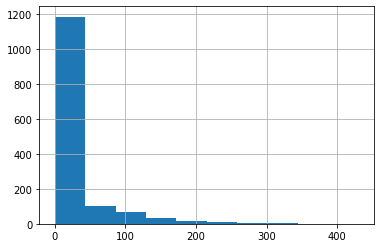

In [23]:
# Check comsumption distribution
df['consumption'].hist();

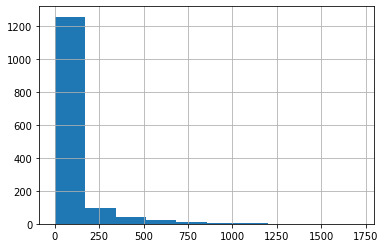

In [24]:
# Check emission distribution
df['co2_emmission'].hist();

In [25]:
# Group by country, select consumption column, and compute mean and median. Since data is skewed, sort by median
df.groupby('country')['consumption'].agg([np.mean, np.median]).sort_values(by='median', ascending=False)

,mean,median
country,,
Hong Kong SAR. China,38.729091,42.44
French Polynesia,31.514545,30.90
Bermuda,27.874545,28.24
France,43.560909,22.91
Luxembourg,45.263636,21.37
...,...,...
Rwanda,3.670909,1.93
India,20.700000,1.92
Kenya,14.778182,1.86


In [26]:
# Group by country, select co2_emmission column, and compute mean and median. Since data is skewed, sort by median
df.groupby('country')['co2_emmission'].agg([np.mean, np.median]).sort_values(by='median', ascending=False)

,mean,median
country,,
Hong Kong SAR. China,135.843636,58.93
French Polynesia,129.517273,52.21
Grenada,39.986364,40.78
United Arab Emirates,81.574545,40.76
Bermuda,134.843636,35.04
...,...,...
Nepal,47.838182,4.28
Bangladesh,34.016364,3.33
Rwanda,16.511818,2.69


In [47]:
# Group by food category, select consumption column, and compute mean and median. Since data is skewed, sort by median
df.groupby('food_category')['consumption'].agg([np.mean, np.median]).sort_values(by='median', ascending=False)

,mean,median
food_category,,
Milk - inc. cheese,125.774692,110.975
Wheat and Wheat Products,71.549538,69.420
Poultry,21.219231,19.855
Fish,17.287077,13.950
Rice,29.375154,11.875
Pork,16.123692,10.355
Eggs,8.163769,8.420
Beef,12.123385,8.285
Nuts inc. Peanut Butter,4.137231,3.495


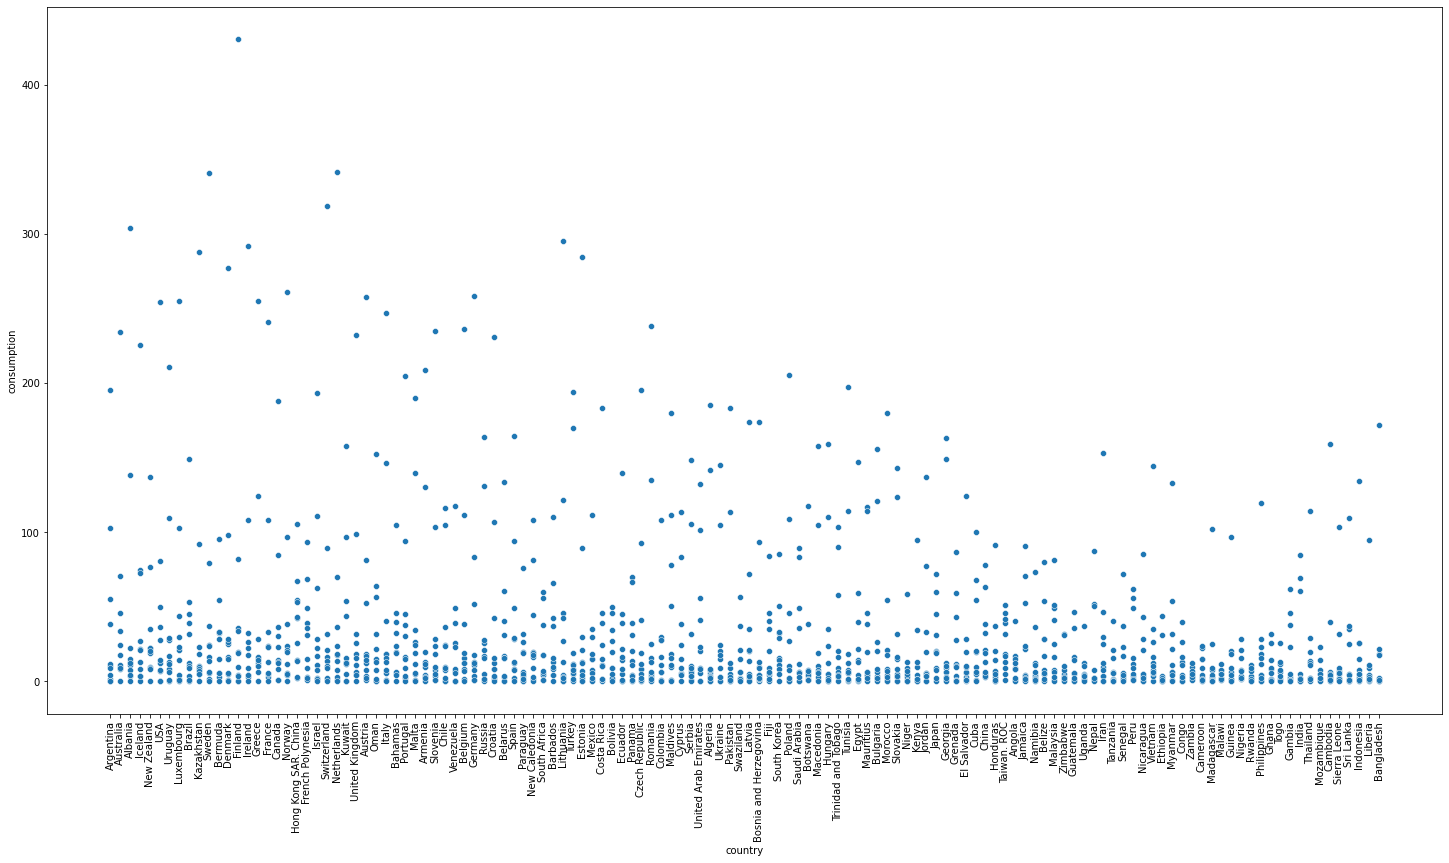

In [85]:
plt.rcParams['figure.figsize'] = (25, 13)
plt.xticks(rotation=90)
sns.scatterplot(data=df, x="country", y='consumption');

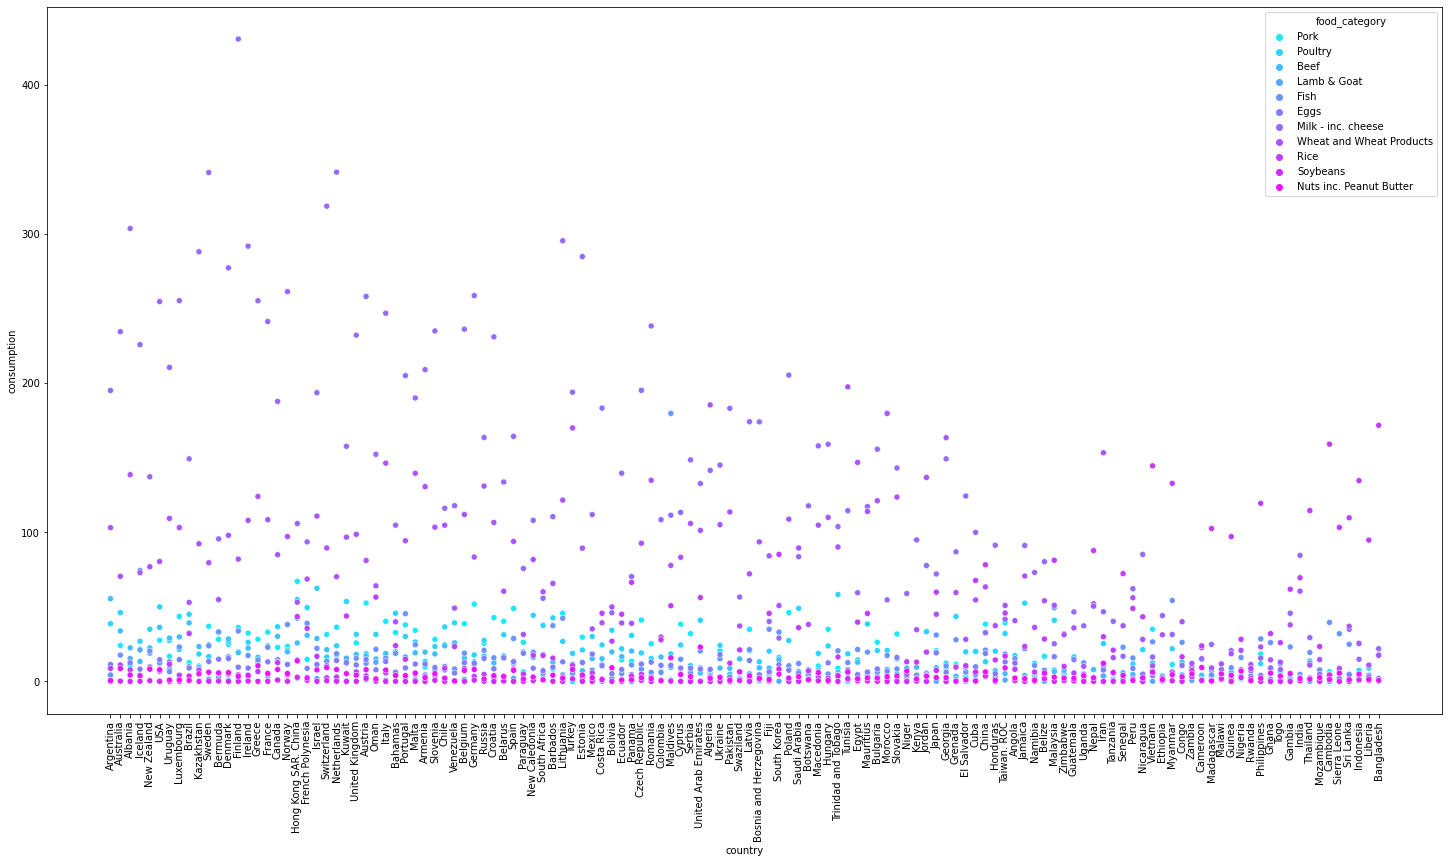

In [109]:
plt.rcParams['figure.figsize'] = (25, 13)
plt.xticks(rotation=90)
sns.scatterplot(data=df, x="country", y='consumption', hue='food_category', palette='cool');

### Distribution of food categories consumption across countries

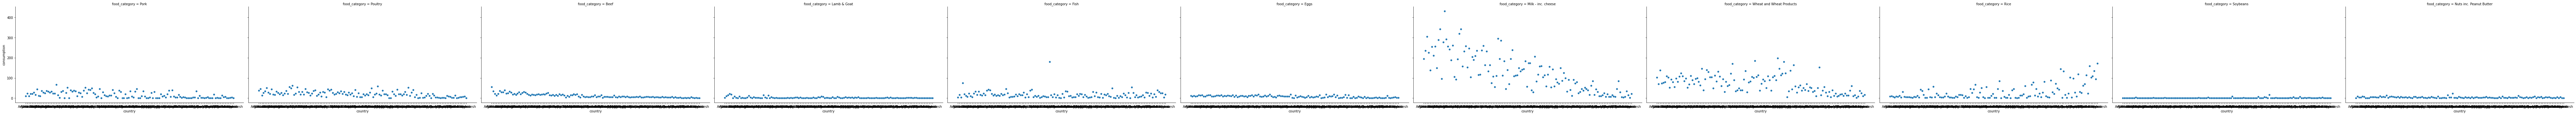

In [108]:
sns.relplot(data=df, x='country', y='consumption', 
            kind='scatter', col='food_category', height=5, aspect=2);

## Measures of spread
- Variance
    - Average distance from each data point to the data's mean
- Standard deviation
- Mean absolute deviation
- Standard deviation vs. mean absolute deviation
    - Standard deviation squares distances, penalizing longer distances more than shorter ones
    - Mean absolute deviation penalizes each distance equally
- Quantiles (Or percentiles)
- Interquartile range (IQR)
    - Height of the box in a boxplot
- Outliers
    - Data point that is substantially different from the others

### Quartiles, quantiles, and quintiles
Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

Calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

In [30]:
# Calculate the quintiles of co2_emission
print(np.quantile(df['co2_emmission'], np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [31]:
# Calculate the quartiles of co2_emission
print(np.quantile(df['co2_emmission'], np.linspace(0, 1, 5)))

[   0.        5.21     16.53     62.5975 1712.    ]


In [32]:
# Calculate the deciles of co2_emission
print(np.quantile(df['co2_emmission'], np.linspace(0, 1, 10)))

[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


### Variance and standard deviation
Variance and standard deviation are two of the most common ways to measure the spread of a variable. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

In [41]:
# Print variance and sd of co2_emission for each food_category
df.groupby('food_category')['co2_emmission'].agg([np.var, np.std]).sort_values(by='std')

,var,std
food_category,,
Soybeans,0.879882,0.938020
Eggs,21.371819,4.622966
Nuts inc. Peanut Butter,35.639652,5.969895
Wheat and Wheat Products,71.023937,8.427570
Poultry,245.026801,15.653332
Fish,921.637349,30.358481
Rice,2281.376243,47.763754
Pork,3094.963537,55.632396
Lamb & Goat,16475.518363,128.356996


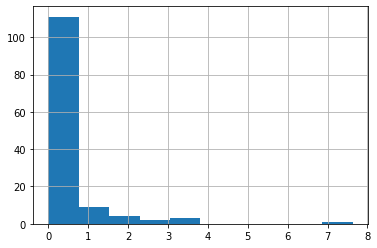

In [42]:
# Create histogram of co2_emission for food_category 'soybeans'
df[df['food_category'] == 'Soybeans']['co2_emmission'].hist();

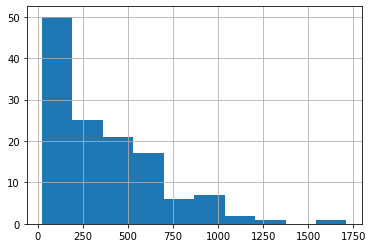

In [37]:
# Create histogram of co2_emission for food_category 'beef'
df[df['food_category'] == 'Beef']['co2_emmission'].hist();

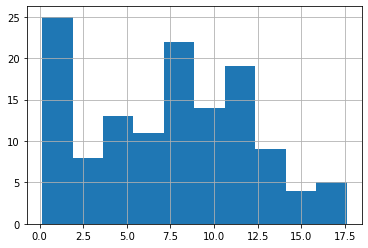

In [39]:
# Create histogram of co2_emission for food_category 'eggs'
df[df['food_category'] == 'Eggs']['co2_emmission'].hist();

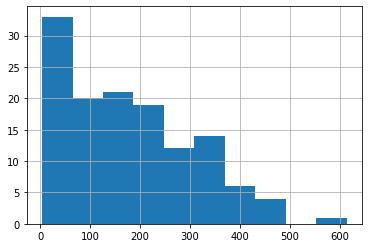

In [43]:
# Create histogram of co2_emission for food_category 'milk'
df[df['food_category'] == 'Milk - inc. cheese']['co2_emmission'].hist();

### Finding outliers using IQR
Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. 
Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than $Q1−1.5×IQR$ or greater than $Q3+1.5×IQR$, it's considered an outlier. 
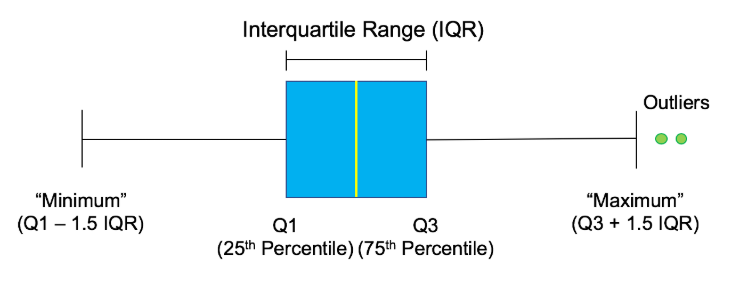

In [111]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = df.groupby('country')['co2_emmission'].sum()

In [112]:
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emmission, Length: 130, dtype: float64

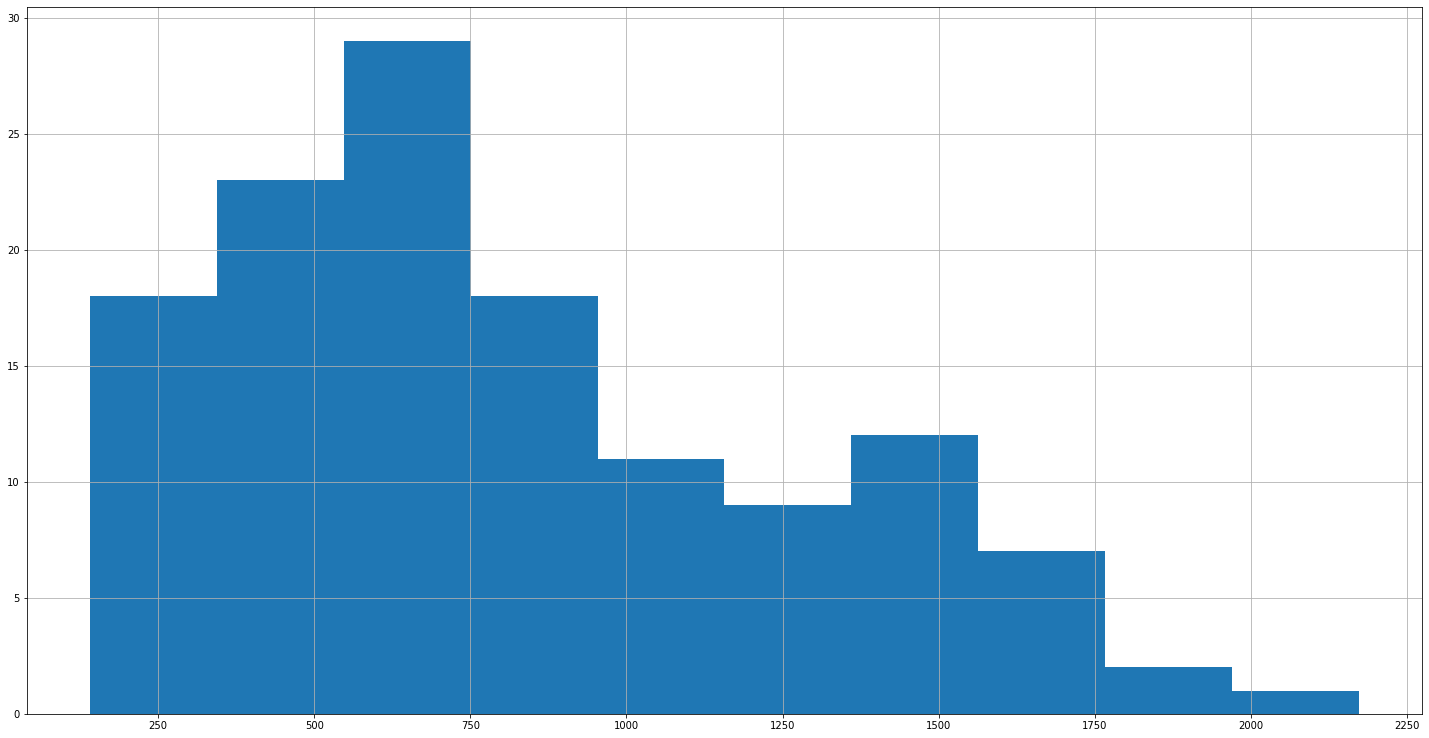

In [126]:
emissions_by_country.hist();

In [115]:
# Compute the first and third quartiles and IQR of emissions_by_country
quartile_1 = np.quantile(emissions_by_country, 0.25)
quartile_3 = np.quantile(emissions_by_country, 0.75)

In [116]:
quartile_1, quartile_3

(446.66, 1111.1525000000001)

In [117]:
iqr = quartile_3-quartile_1

In [118]:
iqr

664.4925000000001

In [119]:
# Calculate the lower and upper cutoffs for outliers
lower = quartile_1 - 1.5 * iqr
upper = quartile_3 + 1.5 * iqr

In [120]:
lower, upper

(-550.0787500000001, 2107.89125)

In [125]:
emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]

country
Argentina    2172.4
Name: co2_emmission, dtype: float64